In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('laptop_pricing_dataset.csv')
df

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,Lenovo,4,IPS Panel,2,1,7,35.560,2.6,8,256,1.70,1891
234,234,Toshiba,3,Full HD,2,1,5,33.782,2.4,8,256,1.20,1950
235,235,Lenovo,4,IPS Panel,2,1,5,30.480,2.6,8,256,1.36,2236
236,236,Lenovo,3,Full HD,3,1,5,39.624,2.5,6,256,2.40,883


In [7]:
#updating the screen size such that all values are round to nearst 2 decimal places
df[['Screen_Size_cm']]=np.round(df[['Screen_Size_cm']],2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


In [9]:
missing_data=df.isnull()
missing_data

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,False,False,False,False,False,False,False,False,False,False,False,False,False
234,False,False,False,False,False,False,False,False,False,False,False,False,False
235,False,False,False,False,False,False,False,False,False,False,False,False,False
236,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
#counting missing values in each column:
for c in missing_data.columns.values.tolist():
    print(c)
    print(missing_data[c].value_counts())
    print("")

Unnamed: 0
Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
Manufacturer
False    238
Name: count, dtype: int64

Category
Category
False    238
Name: count, dtype: int64

Screen
Screen
False    238
Name: count, dtype: int64

GPU
GPU
False    238
Name: count, dtype: int64

OS
OS
False    238
Name: count, dtype: int64

CPU_core
CPU_core
False    238
Name: count, dtype: int64

Screen_Size_cm
Screen_Size_cm
False    234
True       4
Name: count, dtype: int64

CPU_frequency
CPU_frequency
False    238
Name: count, dtype: int64

RAM_GB
RAM_GB
False    238
Name: count, dtype: int64

Storage_GB_SSD
Storage_GB_SSD
False    238
Name: count, dtype: int64

Weight_kg
Weight_kg
False    233
True       5
Name: count, dtype: int64

Price
Price
False    238
Name: count, dtype: int64



In [15]:
#screen_size has 4 missing data and weight also has 5 missing data
#first lets's calculate the avg weight and replace it the missing one
avg_weight=df['Weight_kg'].mean(axis=0)
#or avg_weight=df['Weight_kg'].astype('float').mean(axis=0)
avg_weight

1.8622317596566522

In [16]:
#replacing the avg weight with missing weight
df['Weight_kg'].replace(np.nan,avg_weight,inplace=True)

In [19]:
#doing the same for screen size by replacing the missing values with most common screen size  
common_screen=df['Screen_Size_cm'].value_counts().idxmax()

In [20]:
df['Screen_Size_cm'].replace(np.nan,common_screen,inplace=True)

In [21]:
#correcting data format

In [22]:
df.dtypes

Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

In [23]:
df[['Screen_Size_cm','Weight_kg']]=df[['Screen_Size_cm','Weight_kg']].astype('float')

In [24]:
df.dtypes

Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

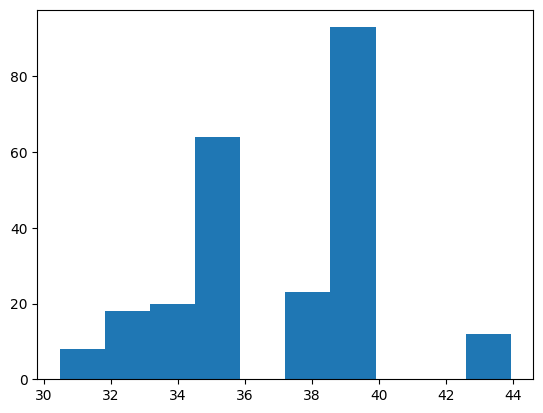

In [27]:

plt.hist(df['Screen_Size_cm'])

plt.show()



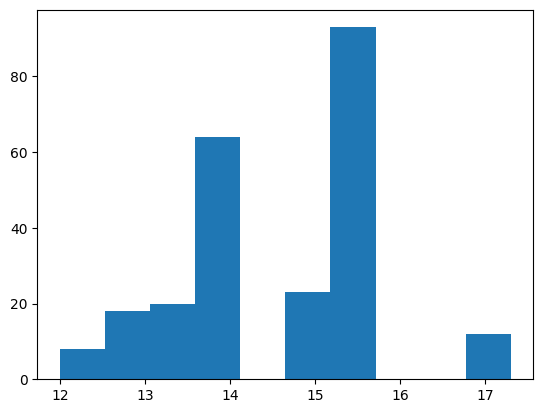

In [28]:
df['Screen_Size_cm']=df['Screen_Size_cm']/2.54
plt.hist(df['Screen_Size_cm'])

plt.show()

In [29]:
df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'},inplace=True)

In [30]:
df[['Screen_Size_inch','Weight_kg']]=np.round(df[['Screen_Size_inch','Weight_kg']],2)

In [31]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,14.0,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,15.6,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,15.6,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,13.3,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,15.6,1.8,8,256,1.91,837


<BarContainer object of 238 artists>

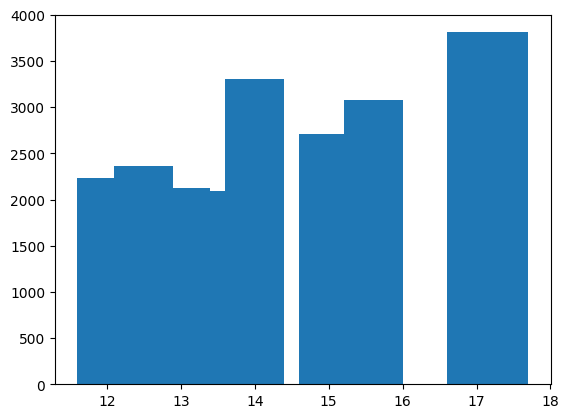

In [35]:
plt.bar(df['Screen_Size_inch'],df['Price'])

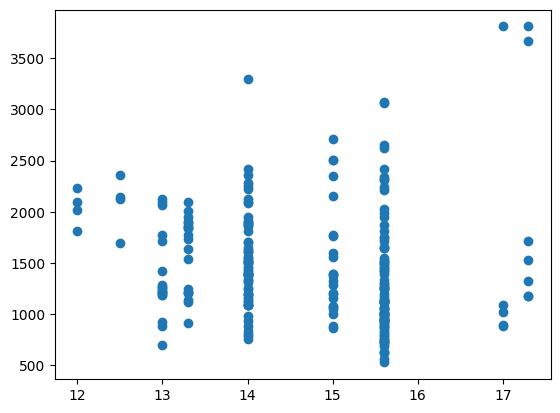

In [36]:
plt.scatter(df['Screen_Size_inch'],df['Price'])

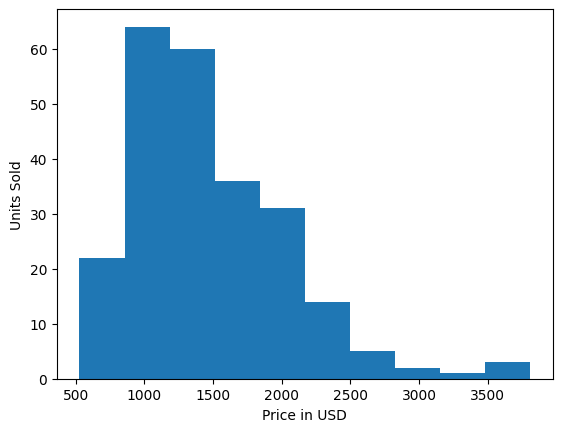

In [39]:
plt.hist(df['Price'])
plt.xlabel('Price in USD')
plt.ylabel('Units Sold')
plt.show()

In [40]:
#rearrange the values into 3 categories

In [42]:
bins=np.linspace(min(df['Price']),max(df['Price']),4)
bins

array([ 527.        , 1621.33333333, 2715.66666667, 3810.        ])

In [43]:
group_name=['Low','Medium','High']

In [44]:
#determining which 
df['Price-binned']=pd.cut(df['Price'],bins,labels=group_name,include_lowest=True)

In [46]:
df[['Price','Price-binned']].head()

,Price,Price-binned
0,978,Low
1,634,Low
2,946,Low
3,1244,Low
4,837,Low


In [47]:
df['Price-binned'].value_counts()

Price-binned
Low       160
Medium     72
High        6
Name: count, dtype: int64

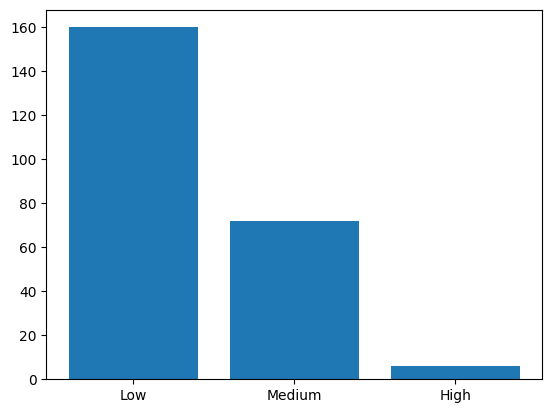

In [49]:
plt.bar(group_name,df['Price-binned'].value_counts())
plt.show()